<a href="https://colab.research.google.com/github/VasanthPrakasam/ML--Sonar_Data--Rock_vs_Mine_Prediction/blob/main/sonar_rock_vs_mine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**<center><h1>SONAR Rock Vs Mine Prediction</h1></center>**
<center><h3>Part 100 ML Projects </h3></center>

---




The SONAR Rock Vs Mine Prediction falls under **Classication Machine Learning Problem**. The project aims to develop a machine learning model capable of accurately distinguishing between metal cylinders(mines) and rocks based on SONAR return data.

# **Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report , f1_score , accuracy_score , confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# **Take a look at the data**
---

In [3]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('/content/sonar_data.csv', header=None)
df=sonar_data.copy()

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
df.shape

(208, 61)

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


M --> Mine

R --> Rock

In [8]:
df.iloc[:,60].value_counts()

,count
60,
M,111
R,97


In [17]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


# **Exploratory Data Analysis**
---

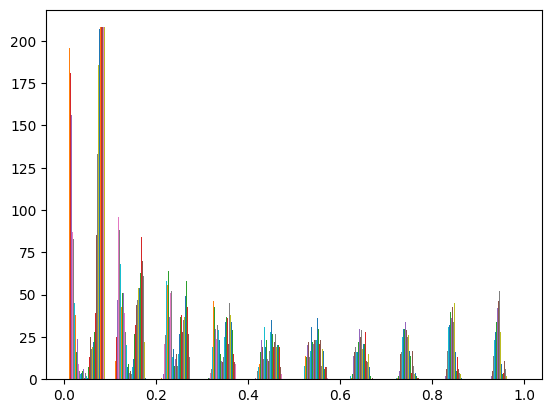

In [9]:
plt.hist (df.drop(df.columns[60], axis = 1))
plt.show()

**Univariate Analysis**

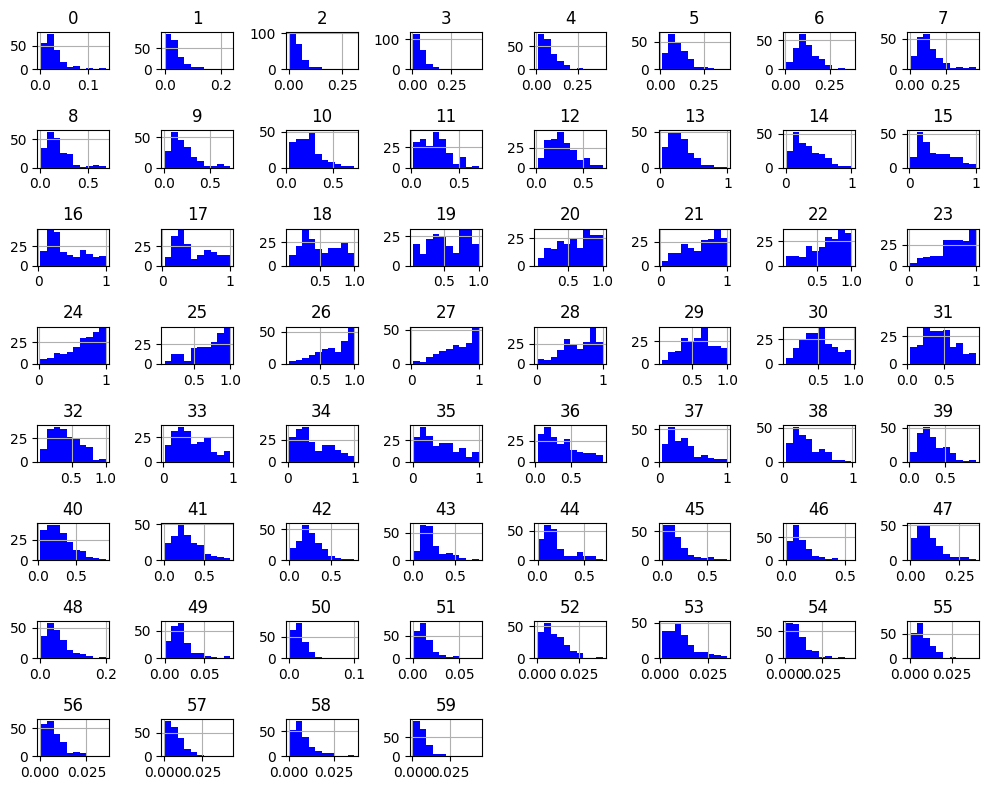

In [10]:
numerical_data = sonar_data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

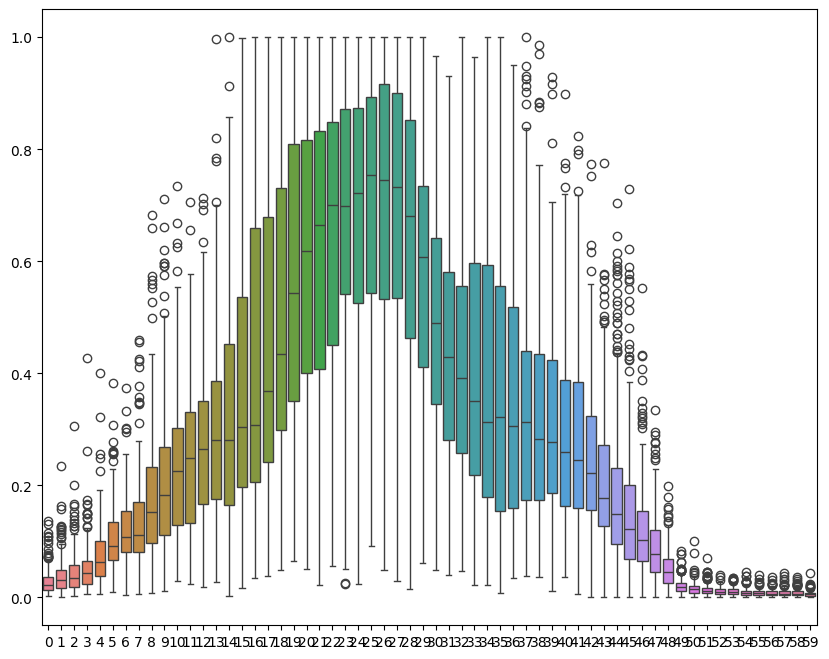

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

/tmp/ipython-input-3269836649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_data, x=categorical_data[column], palette="Set1")


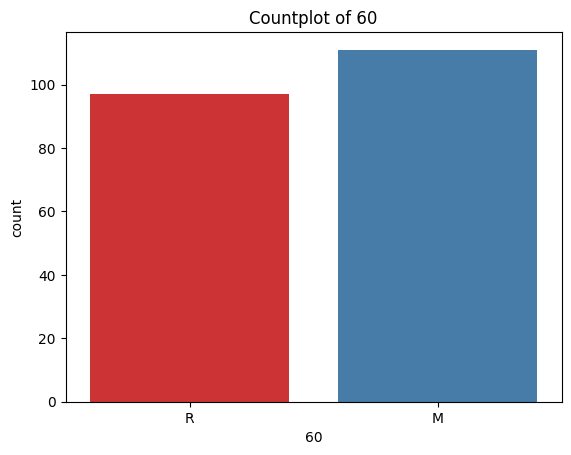

In [13]:
categorical_data = sonar_data.select_dtypes(include='object')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=categorical_data[column], palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

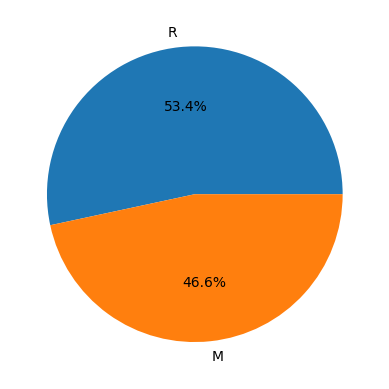

In [14]:
plt.pie(df.iloc[:,60].value_counts(), labels=['R','M'], autopct='%1.1f%%')
plt.show()

**Multivariate Analysis**

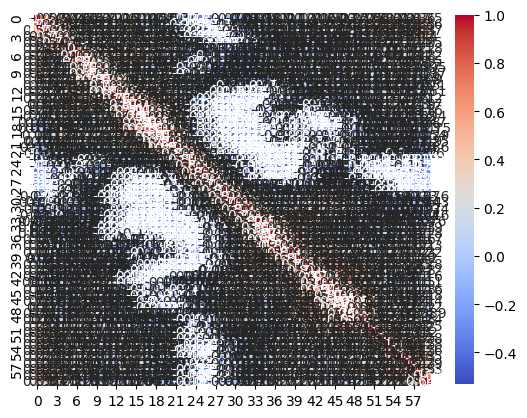

In [16]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [18]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [19]:
total = sonar_data.isnull().sum().sort_values(ascending=False)
percent = (sonar_data.isnull().sum()/sonar_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [20]:
total = sonar_data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocesing**
----

It's important to conduct preprocessing steps separately on train, test sets to avoid data leakage, which can lead to overly optimistic performance estimates.
so let's split the data

**Data Splitting**

In [21]:
X = df.drop(df.columns[60], axis = 1)
y = df.iloc[:,60]

In [30]:
# # separating data and Labels
# X = sonar_data.drop(columns=60, axis=1)
# Y = sonar_data[60]

In [31]:
print(X)


         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [32]:
print(y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101)

In [34]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (145, 60) (63, 60)


In [37]:
print(X_train)

[[ 0.56167041  0.26031659 -1.04745103 ...  0.43556339 -0.32606583
   0.74719932]
 [ 0.4231924   0.79543272 -0.10970324 ...  0.38640452 -0.14035564
  -0.17543667]
 [-0.61749976 -0.56888989 -0.41607307 ... -0.36919831 -0.51197921
  -0.74977789]
 ...
 [-0.85226999 -0.61926657 -0.75841918 ... -0.97947824 -0.42744791
  -0.84257989]
 [-0.75568936 -0.25892878 -0.72047089 ...  0.22243614 -1.17277062
  -0.37903223]
 [-0.05681587  0.02337057  0.86373901 ...  0.04188316  1.01994669
   0.85760872]]


In [36]:
print(y_train)

33     0
45     0
190    1
206    1
53     0
      ..
63     0
70     0
81     0
11     0
95     0
Name: 60, Length: 145, dtype: int64


**Encoding Categorical Variables**

In [23]:
y_train = y_train.apply(lambda x : 0 if x == 'R' else 1)
y_test = y_test.apply(lambda x : 0 if x == 'R' else 1)

**Dealing with Outliers**

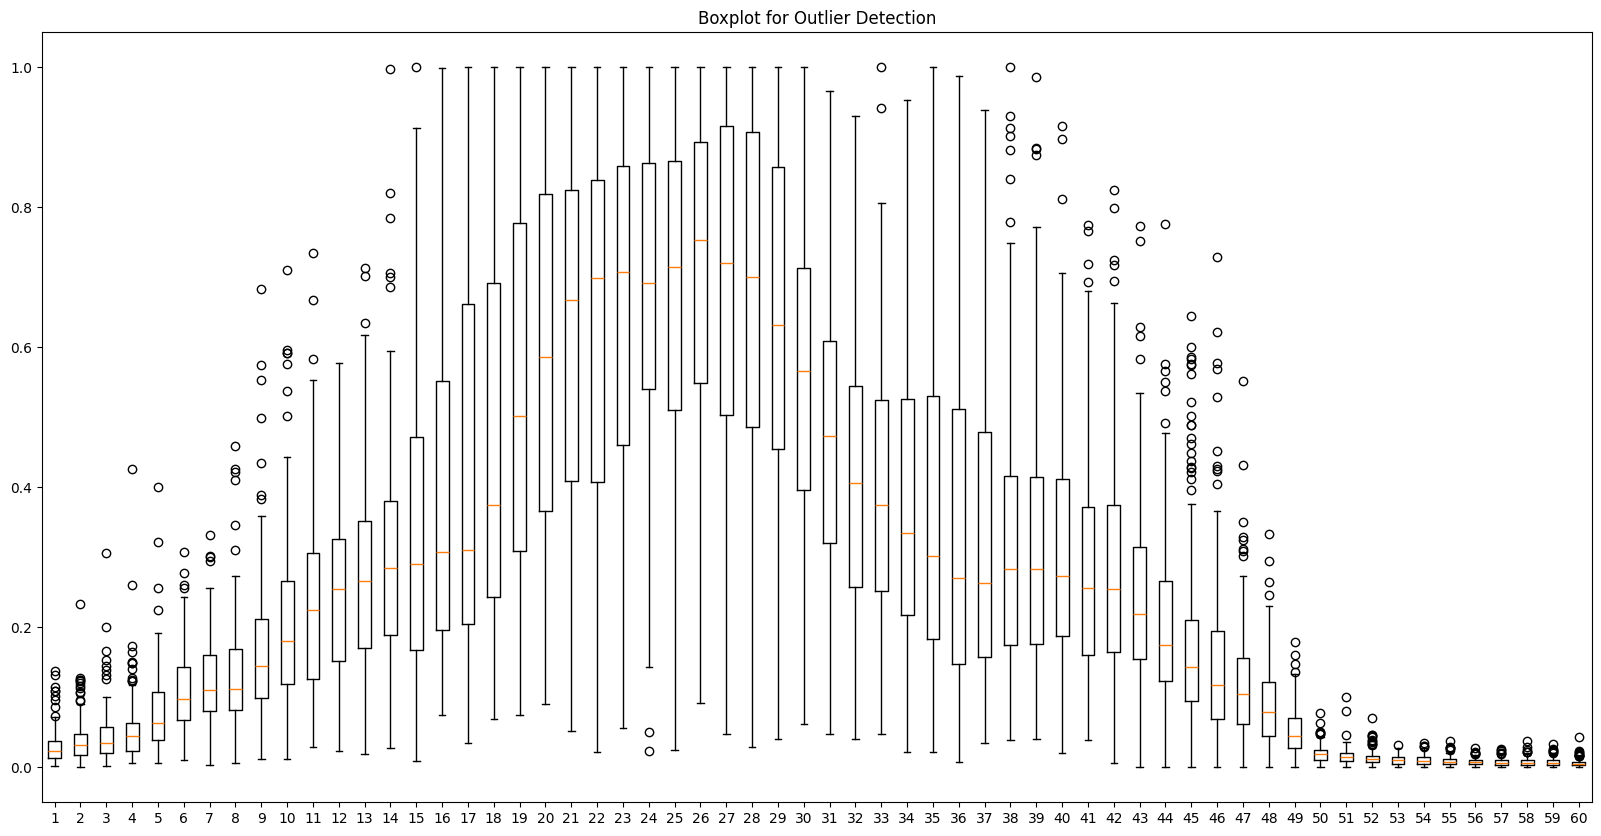

In [24]:
# Boxplot
plt.figure(figsize=(20, 10))
plt.boxplot(X_train)
plt.title('Boxplot for Outlier Detection')
plt.show()

In [25]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
outliers = X_train[((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers using IQR method:")
print(outliers)

Outliers using IQR method:
         0       1       2       3       4       5       6       7       8   \
33   0.0442  0.0477  0.0049  0.0581  0.0278  0.0678  0.1664  0.1490  0.0974   
45   0.0408  0.0653  0.0397  0.0604  0.0496  0.1817  0.1178  0.1024  0.0583   
100  0.0629  0.1065  0.1526  0.1229  0.1437  0.1190  0.0884  0.0907  0.2107   
129  0.1371  0.1226  0.1385  0.1484  0.1776  0.1428  0.1773  0.2161  0.1630   
134  0.1083  0.1070  0.0257  0.0837  0.0748  0.1125  0.3322  0.4590  0.5526   
80   0.0229  0.0369  0.0040  0.0375  0.0455  0.1452  0.2211  0.1188  0.0750   
127  0.0209  0.0261  0.0120  0.0768  0.1064  0.1680  0.3016  0.3460  0.3314   
102  0.0587  0.1210  0.1268  0.1498  0.1436  0.0561  0.0832  0.0672  0.1372   
104  0.0307  0.0523  0.0653  0.0521  0.0611  0.0577  0.0665  0.0664  0.1460   
165  0.0221  0.0065  0.0164  0.0487  0.0519  0.0849  0.0812  0.1833  0.2228   
167  0.0137  0.0297  0.0116  0.0082  0.0241  0.0253  0.0279  0.0130  0.0489   
156  0.0047  0.0059  0.00

In [26]:
X_train = np.log(X_train + 1)
X_test = np.log(X_test + 1)

**Data Normalization**

In [27]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# **Model Training --> Logistic Regression**

In [40]:
model = LogisticRegression()

In [41]:
#training the Logistic Regression model with training data
model.fit(X_train, y_train)

LogisticRegression()

**Model Evaluation**

In [42]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [43]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9310344827586207


In [44]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [45]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8253968253968254


# **Modeling**

In [28]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('xgboost', xgb.XGBClassifier(tree_method="hist")),
]

In [29]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class classification
    print(f'{clf_name}: F1 Score = {f1:.2f}')
    print(f'{clf_name} Classification Report:\n{classification_report(y_test, y_pred)}')
    print('---------------------------------------------------')

Logistic Regression: F1 Score = 0.82
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.85      0.77      0.81        30

    accuracy                           0.83        63
   macro avg       0.83      0.82      0.82        63
weighted avg       0.83      0.83      0.82        63

---------------------------------------------------
Random Forest: F1 Score = 0.82
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.77      0.90      0.83        30

    accuracy                           0.83        63
   macro avg       0.83      0.83      0.83        63
weighted avg       0.84      0.83      0.82        63

---------------------------------------------------
Gradient Boosting: F1 Score = 0.83
Gradient Boosting Classification Report:
              prec

# **Hypertuning Parameter**

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score

classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('xgboost', xgb.XGBClassifier(tree_method="hist")),
]

# Define parameter grids for each classifier
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'xgboost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

results = {}

for clf_name, clf in classifiers:
    print(f"Performing GridSearchCV for {clf_name}...")
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[clf_name] = {
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'test_f1_score': f1,
        'classification_report': classification_report(y_test, y_pred)
    }

    print(f"Finished GridSearchCV for {clf_name}")
    print("-" * 50)

# Print the results for all classifiers
for clf_name, result in results.items():
    print(f"Results for {clf_name}:")
    print("Best parameters found: ", result['best_params'])
    print("Best cross-validation F1 score: {:.2f}".format(result['best_cv_score']))
    print(f'Test F1 Score: {result["test_f1_score"]:.2f}')
    print(f'Classification Report:\n{result["classification_report"]}')
    print("=" * 50)

Performing GridSearchCV for Logistic Regression...
Finished GridSearchCV for Logistic Regression
--------------------------------------------------
Performing GridSearchCV for Random Forest...
Finished GridSearchCV for Random Forest
--------------------------------------------------
Performing GridSearchCV for Gradient Boosting...
Finished GridSearchCV for Gradient Boosting
--------------------------------------------------
Performing GridSearchCV for K-Nearest Neighbors...
Finished GridSearchCV for K-Nearest Neighbors
--------------------------------------------------
Performing GridSearchCV for Support Vector Machine...
Finished GridSearchCV for Support Vector Machine
--------------------------------------------------
Performing GridSearchCV for xgboost...
Finished GridSearchCV for xgboost
--------------------------------------------------
Results for Logistic Regression:
Best parameters found:  {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation F1 score: 0.73
Test 

# **select the best model:**

In [50]:
# Find the best model based on the test F1 score
best_model_name = None
best_f1_score = -1

for clf_name, result in results.items():
    if result['test_f1_score'] > best_f1_score:
        best_f1_score = result['test_f1_score']
        best_model_name = clf_name

print(f"The best performing model based on test F1 score is: {best_model_name}")
print(f"Test F1 Score of the best model: {best_f1_score:.2f}")

# You can access the best model's parameters and the model itself like this:
best_model_params = results[best_model_name]['best_params']
print("Best parameters of the best model:", best_model_params)

# To get the best model object, you would need to re-initialize it with the best parameters or
# store the best_estimator_ from GridSearchCV in the results dictionary.
# For now, we will just identify the name and parameters.

The best performing model based on test F1 score is: Support Vector Machine
Test F1 Score of the best model: 0.90
Best parameters of the best model: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


# **Make predictions**

In [51]:
from sklearn.svm import SVC
import numpy as np

# Re-initialize the best model with the identified parameters
best_svc_model = SVC(**best_model_params)

# Train the model on the entire training data (optional, but generally recommended after tuning)
best_svc_model.fit(X_train, y_train)

# Prepare the input data (assuming input_data is already defined and is a tuple or list)
# Apply the same preprocessing steps as used for the training data
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Apply log transformation (if it was applied to training data)
# Check the previous code to see if log transformation was applied
# Looking at cell `98436e66`, log transformation was applied.
input_data_log = np.log(input_data_reshaped + 1)


# Apply standardization using the same scalar fitted on the training data
# Check the previous code to see if standardization was applied
# Looking at cell `337de4e1`, standardization was applied.
input_data_scaled = scalar.transform(input_data_log)


# Make a prediction
prediction = best_svc_model.predict(input_data_scaled)

# Interpret the prediction
if prediction[0] == 0:
    print('The object is a Rock (R)')
else:
    print('The object is a Mine (M)')

The object is a Mine (M)


# **Making a Predictive System**

In [46]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


[1]
The object is a mine
